## **<center>REPORT - Assignment 1 DBMS</center>**
#### **<center>Nishtha - 180489</center>**

This is the report and here we will clean time and create graphs and conclude about the findings through them. The libraries used in the work will have to be installed first.<br>
According to my roll number, the csv files I picked for creating these databases were :
- A-100
- A-1000
- A-10000
- B-100-3-1
- B-100-5-2
- B-100-10-1
- B-1000-5-2
- B-1000-10-4
- B-1000-50-2
- B-10000-5-1
- B-10000-50-2
- B-10000-500-1


The 9 databases formed according to question were therefore:
- **A_100, B_100_3_1 (db1)**
- **A_100, B_100_5_2 (db2)**
- **A_100, B_100_10_1 (db3)**
- **A_1000, B_1000_5_2 (db4)**
- **A_1000, B_1000_10_4 (db5)**
- **A_1000, B_1000_50_2 (db6)**
- **A_10000, B_10000_5_1 (db7)**
- **A_10000, B_10000_50-2 (db8)**
- **A-10000, B_10000_500_1 (db9)**


In [101]:
#!pip install matplotlib
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

## **Part 1 - Equilvalent SQL and Mongo Queries**
You can find these queries in the respective notebooks in the respective folders. Each notebook comprises of the code to create and then implement the queries to find time.

Also the queries have been mentioned here:
**1. SQL**
   - (a) SELECT * FROM A WHERE A1 <= 50;<br>
   - (b) SELECT * FROM B ORDER BY B3;<br>
   - (c) SELECT AVG(X.COL) FROM (SELECT COUNT(B2) AS COL FROM B GROUP BY B2) AS X;<br>
   - (d) SELECT A2, B1, B2, B3 FROM A, B WHERE A.A1 = B.B2;<br>
**2. Mongo**
   - (a) #$ db.A.aggregate([{ "$match" : { "A1" : { "$lte" :  50 }}}]); #$<br>
   - (b) #$ db.B.aggregate([{"$sort" : { "B3" : 1 }}]); #$<br>
   - (c) #$ db.B.aggregate([{ "$group" : { '_id' : "$B2", "Average" : { "$sum" : 1 }}}, { "$group" : { '_id': "null", "Avg per A1" : { "$avg" : "$Average" }}}]); #$<br>
   - (d) #$ db.B.aggregate([{ "$lookup" : { 'from' : "A", 'localField' : "B2", 'foreignField' : "A1", 'as' : "nA"}}, {"$unwind" : "$nA"}, { "$project":{"nA.A2" : 1, 'B1' : 1,'B2' : 1, 'B3' : 1}}]) #$ 
## **Part 2 - Find and Report times for queries**
THe times have been reported in the repsective notebooks. Next, here we will load them again and do their cleaning to find mean and standard deviation and then to draw their graphs.

#### **1. Importing time from sql**

In [102]:
time_sql_q1 = pd.read_csv('sql/t1.csv', header = None)
time_sql_q2 = pd.read_csv('sql/t2.csv', header = None)
time_sql_q3 = pd.read_csv('sql/t3.csv', header = None)
time_sql_q4 = pd.read_csv('sql/t4.csv', header = None)

#### **2. Importing time from Mariadb - with indexing**

In [103]:
time_maria_q1 = pd.read_csv('mariadb/t1.csv', header = None)
time_maria_q2 = pd.read_csv('mariadb/t2.csv', header = None)
time_maria_q3 = pd.read_csv('mariadb/t3.csv', header = None)
time_maria_q4 = pd.read_csv('mariadb/t4.csv', header = None)

#### **3. Importing time from Mariadb - without indexing**

In [104]:
time_maria_woind_q1 = pd.read_csv('mariadb-woind/t1.csv', header = None)
time_maria_woind_q2 = pd.read_csv('mariadb-woind/t2.csv', header = None)
time_maria_woind_q3 = pd.read_csv('mariadb-woind/t3.csv', header = None)
time_maria_woind_q4 = pd.read_csv('mariadb-woind/t4.csv', header = None)

#### **4. Importing time from Mongodb**

In [105]:
time_mongo_q1 = pd.read_csv('mongodb/t1.csv', header = None)
time_mongo_q2 = pd.read_csv('mongodb/t2.csv', header = None)
time_mongo_q3 = pd.read_csv('mongodb/t3.csv', header = None)
time_mongo_q4 = pd.read_csv('mongodb/t4.csv', header = None)

### **Function to find mean and standard deviation**

In [106]:
def mean_dev(time):
    for col in time:
        time[col] = time[col].sort_values(ignore_index = True)
    #print(time)
    time = time.drop([0, 6], axis = 0)
    #print(time)
    mean = np.mean(time, axis = 0)
    std = np.std(time, axis = 0)
    return np.array(mean), np.array(std)

#### **1. Mean and Standard Deviation for SQL**

In [107]:
mean_tq1_sql, dev_tq1_sql = mean_dev(time_sql_q1)
print(mean_tq1_sql, dev_tq1_sql)

[9.10e-05 9.00e-05 9.10e-05 9.30e-05 9.20e-05 9.20e-05 1.18e-04 9.70e-05
 9.30e-05] [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.35525272e-20 0.00000000e+00
 0.00000000e+00]


In [108]:
mean_tq2_sql, dev_tq2_sql = mean_dev(time_sql_q2)
print(mean_tq2_sql, dev_tq2_sql)

[2.775350e-01 5.720000e-04 6.530000e-04 3.894000e-03 7.423000e-03
 3.774400e-02 5.127000e-02 4.045410e-01 6.528475e+00] [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.33680869e-19
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.55111512e-17
 0.00000000e+00]


In [109]:
mean_tq3_sql, dev_tq3_sql = mean_dev(time_sql_q3)
print(mean_tq3_sql, dev_tq3_sql)

[2.920000e-04 2.640000e-04 3.100000e-04 1.508000e-03 2.590000e-03
 9.439000e-03 1.655500e-02 1.251050e-01 4.013321e+00] [0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [110]:
mean_tq4_sql, dev_tq4_sql = mean_dev(time_sql_q4)
print(mean_tq4_sql, dev_tq4_sql)

[1.97479e-01 5.48000e-04 7.94000e-04 4.41900e-03 7.77700e-03 3.35330e-02
 4.93070e-02 3.48745e-01 5.35809e+00] [0.00000000e+00 0.00000000e+00 1.08420217e-19 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


#### **2. Mean and Standard Deviation for Mariadb With Index**

In [111]:
mean_tq1_mar, dev_tq1_mar = mean_dev(time_maria_q1)
print(mean_tq1_mar, dev_tq1_mar)

[1.06e-04 1.03e-04 1.04e-04 1.04e-04 9.50e-05 1.05e-04 1.06e-04 1.09e-04
 1.08e-04] [0.00000000e+00 1.35525272e-20 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.35525272e-20 0.00000000e+00 0.00000000e+00
 1.35525272e-20]


In [112]:
mean_tq2_mar, dev_tq2_mar = mean_dev(time_maria_q2)
print(mean_tq2_mar, dev_tq2_mar)

[1.17e-04 9.80e-05 1.16e-04 9.60e-05 9.80e-05 1.05e-04 1.00e-04 1.24e-04
 9.90e-05] [0.00000000e+00 0.00000000e+00 1.35525272e-20 0.00000000e+00
 0.00000000e+00 1.35525272e-20 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


In [113]:
mean_tq3_mar, dev_tq3_mar = mean_dev(time_maria_q3)
print(mean_tq3_mar, dev_tq3_mar)

[0.000112 0.000107 0.000134 0.000124 0.000136 0.00013  0.000133 0.000117
 0.00012 ] [0.00000000e+00 1.35525272e-20 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


In [114]:
mean_tq4_mar, dev_tq4_mar = mean_dev(time_maria_q4)
print(mean_tq4_mar, dev_tq4_mar)

[0.000117 0.000154 0.000182 0.000203 0.000176 0.000136 0.000116 0.00012
 0.000116] [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.35525272e-20 0.00000000e+00
 1.35525272e-20]


#### **3. Mean and Standard Deviation for Mariadb Without Index**

In [115]:
mean_tq1_marwo, dev_tq1_marwo = mean_dev(time_maria_woind_q1)
print(mean_tq1_marwo, dev_tq1_marwo)

[0.002268 0.002226 0.002207 0.003989 0.003344 0.002885 0.007639 0.007895
 0.007029] [0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [116]:
mean_tq2_marwo, dev_tq2_marwo = mean_dev(time_maria_woind_q2)
print(mean_tq2_marwo, dev_tq2_marwo)

[2.7956000e-02 3.2778000e-02 1.1385000e-02 4.1610000e-02 5.6506000e-02
 1.4690900e-01 2.0387500e-01 2.0765380e+00 1.8244629e+02] [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.93889390e-18 0.00000000e+00 2.77555756e-17 0.00000000e+00
 0.00000000e+00]


In [117]:
mean_tq3_marwo, dev_tq3_marwo = mean_dev(time_maria_woind_q3)
print(mean_tq3_marwo, dev_tq3_marwo)

[0.002331 0.001873 0.002131 0.004659 0.006377 0.021933 0.03442  0.178706
 1.539617] [0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [118]:
mean_tq4_marwo, dev_tq4_marwo = mean_dev(time_maria_woind_q4)
print(mean_tq4_marwo, dev_tq4_marwo)

[1.09830000e-02 1.22730000e-02 1.58510000e-02 5.09343000e-01
 8.69416000e-01 3.65175900e+00 4.88013940e+01 3.61422220e+02
 3.55011465e+03] [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.54747351e-13]


#### **4. Mean and Standard Deviation for Mongodb**

In [119]:
mean_tq1_mon, dev_tq1_mon = mean_dev(time_mongo_q1)
print(mean_tq1_mon, dev_tq1_mon)

[0.00188  0.011152 0.013667 0.007534 0.003017 0.002637 0.009667 0.015387
 0.014923] [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.73472348e-18
 1.73472348e-18]


In [120]:
mean_tq2_mon, dev_tq2_mon = mean_dev(time_mongo_q2)
print(mean_tq2_mon, dev_tq2_mon)

[5.002000e-03 4.111000e-03 3.882000e-03 9.643000e-03 1.548900e-02
 5.661100e-02 7.358300e-02 6.104810e-01 8.235404e+00] [0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [121]:
mean_tq3_mon, dev_tq3_mon = mean_dev(time_mongo_q3)
print(mean_tq3_mon, dev_tq3_mon)

[5.518000e-03 1.032800e-02 3.473000e-03 8.393000e-03 1.654300e-02
 5.174300e-02 8.173800e-02 5.198410e-01 4.160537e+00] [0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [122]:
mean_tq4_mon, dev_tq4_mon = mean_dev(time_mongo_q4)
print(mean_tq4_mon, dev_tq4_mon)

[0.023502 0.029408 0.019482 0.09086  0.110093 0.165954 1.240149 1.019666
 0.85443 ] [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.38777878e-17 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.11022302e-16]


#### **Final Tables of Mean and Standard Deviation**
Here we will first find the means and standard deviations concatenation them for each database and then construct the final table.

In [123]:
mean_sql = np.array([mean_tq1_sql, mean_tq2_sql, mean_tq3_sql, mean_tq4_sql])
std_sql =  np.array([dev_tq1_sql, dev_tq2_sql, dev_tq3_sql, dev_tq4_sql])
#print(mean_sql, std_sql)

In [124]:
mean_maria = np.array([mean_tq1_mar, mean_tq2_mar, mean_tq3_mar, mean_tq4_mar])
std_maria =  np.array([dev_tq1_mar, dev_tq2_mar, dev_tq3_mar, dev_tq4_mar])
#print(mean_sql, std_sql)

In [125]:
mean_mariawin = np.array([mean_tq1_marwo, mean_tq2_marwo, mean_tq3_marwo, mean_tq4_marwo])
std_mariawin =  np.array([dev_tq1_marwo, dev_tq2_marwo, dev_tq3_marwo, dev_tq4_marwo])
#print(mean_sql, std_sql)

In [126]:
mean_mongo = np.array([mean_tq1_mon, mean_tq2_mon, mean_tq3_mon, mean_tq4_mon])
std_mongo =  np.array([dev_tq1_mon, dev_tq2_mon, dev_tq3_mon, dev_tq4_mon])
#print(mean_sql, std_sql)

#### **Mean for all Databases**

In [127]:
mean_final = pd.concat([pd.DataFrame(mean_sql), pd.DataFrame(mean_maria), pd.DataFrame(mean_mariawin), pd.DataFrame(mean_mongo)], keys = ["Sqlite3", "Maria (With Index)", "Maria (Without Index)", "Mongodb"])
mean_final.columns = ["db1", "db2", "db3", "db4", "db5", "db6", "db7", "db8", "db9"]

In [128]:
mean_final

db1       db2       db3       db4       db5  \
Sqlite3               0  0.000091  0.000090  0.000091  0.000093  0.000092   
                      1  0.277535  0.000572  0.000653  0.003894  0.007423   
                      2  0.000292  0.000264  0.000310  0.001508  0.002590   
                      3  0.197479  0.000548  0.000794  0.004419  0.007777   
Maria (With Index)    0  0.000106  0.000103  0.000104  0.000104  0.000095   
                      1  0.000117  0.000098  0.000116  0.000096  0.000098   
                      2  0.000112  0.000107  0.000134  0.000124  0.000136   
                      3  0.000117  0.000154  0.000182  0.000203  0.000176   
Maria (Without Index) 0  0.002268  0.002226  0.002207  0.003989  0.003344   
                      1  0.027956  0.032778  0.011385  0.041610  0.056506   
                      2  0.002331  0.001873  0.002131  0.004659  0.006377   
                      3  0.010983  0.012273  0.015851  0.509343  0.869416   
Mongodb               0  0.001880  0.011152  0.013667  0.007534  0.003017   
                      1  0.005002  0.004111  0.003882  0.009643  0.015489   
                      2  0.005518  0.010328  0.003473  0.008393  0.016543   
                      3  0.023502  0.029408  0.019482  0.090860  0.110093   

                              db6        db7         db8          db9  
Sqlite3               0  0.000092   0.000118    0.000097     0.000093  
                      1  0.037744   0.051270    0.404541     6.528475  
                      2  0.009439   0.016555    0.125105     4.013321  
                      3  0.033533   0.049307    0.348745     5.358090  
Maria (With Index)    0  0.000105   0.000106    0.000109     0.000108  
                      1  0.000105   0.000100    0.000124     0.000099  
                      2  0.000130   0.000133    0.000117     0.000120  
                      3  0.000136   0.000116    0.000120     0.000116  
Maria (Without Index) 0  0.002885   0.007639    0.007895     0.007029  
                      1  0.146909   0.203875    2.076538   182.446290  
                      2  0.021933   0.034420    0.178706     1.539617  
                      3  3.651759  48.801394  361.422220  3550.114653  
Mongodb               0  0.002637   0.009667    0.015387     0.014923  
                      1  0.056611   0.073583    0.610481     8.235404  
                      2  0.051743   0.081738    0.519841     4.160537  
                      3  0.165954   1.240149    1.019666     0.854430

#### **Standard Deviation for all Databases**

In [129]:
std_final = pd.concat([pd.DataFrame(std_sql), pd.DataFrame(std_maria), pd.DataFrame(std_mariawin), pd.DataFrame(std_mongo)], keys = ["Sqlite3", "Maria (With Index)", "Maria (Without Index)", "Mongodb"])
std_final.columns = ["db1", "db2", "db3", "db4", "db5", "db6", "db7", "db8", "db9"]
std_final

db1           db2           db3           db4  \
Sqlite3               0  0.0  0.000000e+00  0.000000e+00  0.000000e+00   
                      1  0.0  0.000000e+00  0.000000e+00  4.336809e-19   
                      2  0.0  0.000000e+00  0.000000e+00  0.000000e+00   
                      3  0.0  0.000000e+00  1.084202e-19  0.000000e+00   
Maria (With Index)    0  0.0  1.355253e-20  0.000000e+00  0.000000e+00   
                      1  0.0  0.000000e+00  1.355253e-20  0.000000e+00   
                      2  0.0  1.355253e-20  0.000000e+00  0.000000e+00   
                      3  0.0  0.000000e+00  0.000000e+00  0.000000e+00   
Maria (Without Index) 0  0.0  0.000000e+00  0.000000e+00  0.000000e+00   
                      1  0.0  0.000000e+00  0.000000e+00  0.000000e+00   
                      2  0.0  0.000000e+00  0.000000e+00  0.000000e+00   
                      3  0.0  0.000000e+00  0.000000e+00  0.000000e+00   
Mongodb               0  0.0  0.000000e+00  0.000000e+00  0.000000e+00   
                      1  0.0  0.000000e+00  0.000000e+00  0.000000e+00   
                      2  0.0  0.000000e+00  0.000000e+00  0.000000e+00   
                      3  0.0  0.000000e+00  0.000000e+00  0.000000e+00   

                                  db5           db6           db7  \
Sqlite3               0  0.000000e+00  0.000000e+00  1.355253e-20   
                      1  0.000000e+00  0.000000e+00  0.000000e+00   
                      2  0.000000e+00  0.000000e+00  0.000000e+00   
                      3  0.000000e+00  0.000000e+00  0.000000e+00   
Maria (With Index)    0  0.000000e+00  1.355253e-20  0.000000e+00   
                      1  0.000000e+00  1.355253e-20  0.000000e+00   
                      2  0.000000e+00  0.000000e+00  0.000000e+00   
                      3  0.000000e+00  0.000000e+00  1.355253e-20   
Maria (Without Index) 0  0.000000e+00  0.000000e+00  0.000000e+00   
                      1  6.938894e-18  0.000000e+00  2.775558e-17   
                      2  0.000000e+00  0.000000e+00  0.000000e+00   
                      3  0.000000e+00  0.000000e+00  0.000000e+00   
Mongodb               0  0.000000e+00  0.000000e+00  0.000000e+00   
                      1  0.000000e+00  0.000000e+00  0.000000e+00   
                      2  0.000000e+00  0.000000e+00  0.000000e+00   
                      3  1.387779e-17  0.000000e+00  0.000000e+00   

                                  db8           db9  
Sqlite3               0  0.000000e+00  0.000000e+00  
                      1  5.551115e-17  0.000000e+00  
                      2  0.000000e+00  0.000000e+00  
                      3  0.000000e+00  0.000000e+00  
Maria (With Index)    0  0.000000e+00  1.355253e-20  
                      1  0.000000e+00  0.000000e+00  
                      2  0.000000e+00  0.000000e+00  
                      3  0.000000e+00  1.355253e-20  
Maria (Without Index) 0  0.000000e+00  0.000000e+00  
                      1  0.000000e+00  0.000000e+00  
                      2  0.000000e+00  0.000000e+00  
                      3  0.000000e+00  4.547474e-13  
Mongodb               0  1.734723e-18  1.734723e-18  
                      1  0.000000e+00  0.000000e+00  
                      2  0.000000e+00  0.000000e+00  
                      3  0.000000e+00  1.110223e-16

## **Part 3 - Running all the graphs**

<Figure size 432x288 with 0 Axes>

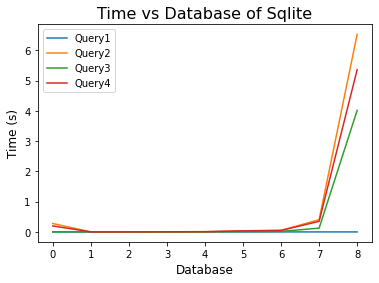

In [130]:
plt.figure()
#x = ["db1", "db2", "db3", "db4", "db5", "db6", "db7", "db8", "db9"]
l = ["Query1", "Query2", "Query3", "Query4"]
pd.DataFrame(mean_sql).T.plot()
plt.title("Time vs Database of Sqlite", fontsize = 16)
plt.xlabel("Database", fontsize = 12)
plt.ylabel("Time (s)", fontsize = 12)
plt.legend(l)
#plt.xticks(x)
plt.savefig('./plots/sqlite.png')

**Findings:** You can see for the sqlite, the larger databases show a bit deviation but the values are not too high i.e. only a few seconds even for the largest of the queries.

<Figure size 432x288 with 0 Axes>

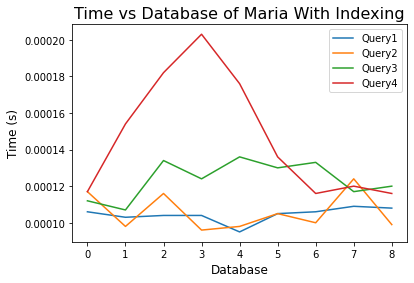

In [131]:
plt.figure()
#x = ["db1", "db2", "db3", "db4", "db5", "db6", "db7", "db8", "db9"]
l = ["Query1", "Query2", "Query3", "Query4"]
pd.DataFrame(mean_maria).T.plot()
plt.title("Time vs Database of Maria With Indexing", fontsize = 16)
plt.xlabel("Database", fontsize = 12)
plt.ylabel("Time (s)", fontsize = 12)
plt.legend(l)
#plt.xticks(x)
plt.savefig('./plots/mariaind.png')

**Findings:** The graph may seem a bit wavy, but on looking at times corresponding to it, we see that even the highest value is too small. So this is a very economical database manager. Also we see the importance and advantage of proper indexing.

<Figure size 432x288 with 0 Axes>

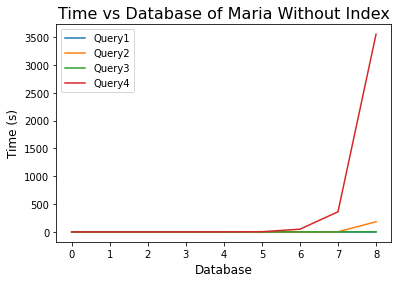

In [132]:
plt.figure()
#x = ["db1", "db2", "db3", "db4", "db5", "db6", "db7", "db8", "db9"]
l = ["Query1", "Query2", "Query3", "Query4"]
pd.DataFrame(mean_mariawin).T.plot()
plt.title("Time vs Database of Maria Without Index", fontsize = 16)
plt.xlabel("Database", fontsize = 12)
plt.ylabel("Time (s)", fontsize = 12)
plt.legend(l)
#plt.xticks(x)
plt.savefig('./plots/mariawin.png')

**Findings:** This is the one that has the last query shoot up. The last query has exceptionally high time of querying. For smaller databases we can see as in other there is not much difference but larger databases show huge difference on 4th query.

<Figure size 432x288 with 0 Axes>

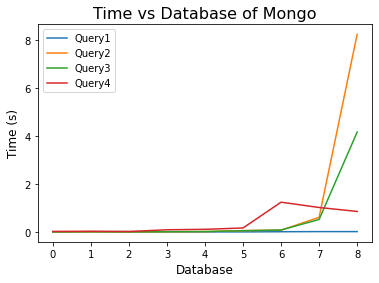

In [133]:
plt.figure()
#x = ["db1", "db2", "db3", "db4", "db5", "db6", "db7", "db8", "db9"]
l = ["Query1", "Query2", "Query3", "Query4"]
pd.DataFrame(mean_mongo).T.plot()
plt.title("Time vs Database of Mongo", fontsize = 16)
plt.xlabel("Database", fontsize = 12)
plt.ylabel("Time (s)", fontsize = 12)
plt.legend(l)
#plt.xticks(x)
plt.savefig('./plots/mnogo.png')

**Findings:** Here we see the second query shoot up a bit more than the 4th. The difference is a few seconds. Thus we see here sorting takes longer than grouping.

<Figure size 432x288 with 0 Axes>

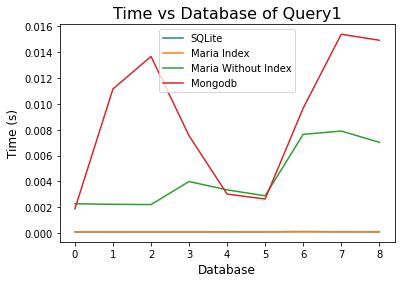

In [134]:
q1 = pd.DataFrame(np.array([mean_tq1_sql, mean_tq1_mar, mean_tq1_marwo, mean_tq1_mon]))
plt.figure()
#print(q1)
#x = ["db1", "db2", "db3", "db4", "db5", "db6", "db7", "db8", "db9"]
l = ["SQLite", "Maria Index", "Maria Without Index", "Mongodb"]
q1.T.plot()
plt.title("Time vs Database of Query1", fontsize = 16)
plt.xlabel("Database", fontsize = 12)
plt.ylabel("Time (s)", fontsize = 12)
plt.legend(l)
#plt.xticks(x)
plt.savefig('./plots/q1.png')

**Findings :** As you can see, the maria indexed and sql graph almost overlap and behave similarly. For the other two as well the highest value attained is 0.016 which is not very high. This is because of the nature of this query finding only first 50 elements. 

<Figure size 432x288 with 0 Axes>

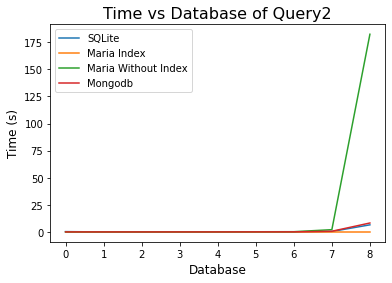

In [135]:
q2 = pd.DataFrame(np.array([mean_tq2_sql, mean_tq2_mar, mean_tq2_marwo, mean_tq2_mon]))
plt.figure()
#x = ["db1", "db2", "db3", "db4", "db5", "db6", "db7", "db8", "db9"]
l = ["SQLite", "Maria Index", "Maria Without Index", "Mongodb"]
q2.T.plot()
plt.title("Time vs Database of Query2", fontsize = 16)
plt.xlabel("Database", fontsize = 12)
plt.ylabel("Time (s)", fontsize = 12)
plt.legend(l)
#plt.xticks(x)
plt.savefig('./plots/q2.png')

**Findings:** Here, you can see high values for the Mariadb without index database. It has exceptionally high value. While mongo is also higher than the other two. All these differences are seen for larger databases.

<Figure size 432x288 with 0 Axes>

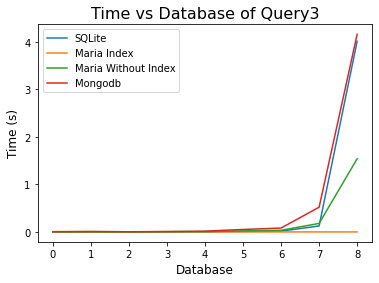

In [136]:
q3 = pd.DataFrame(np.array([mean_tq3_sql, mean_tq3_mar, mean_tq3_marwo, mean_tq3_mon]))
plt.figure()
#x = ["db1", "db2", "db3", "db4", "db5", "db6", "db7", "db8", "db9"]
l = ["SQLite", "Maria Index", "Maria Without Index", "Mongodb"]
q3.T.plot()
plt.title("Time vs Database of Query3", fontsize = 16)
plt.xlabel("Database", fontsize = 12)
plt.ylabel("Time (s)", fontsize = 12)
plt.legend(l)
#plt.xticks(x)
plt.savefig('./plots/q3.png')

**Findings:** Here, we see mongodb having very high values and surprisingly sqlite also on a bit higher note. But we see that there is not a huge difference in time, only a few seconds and that too for larger databases.

<Figure size 432x288 with 0 Axes>

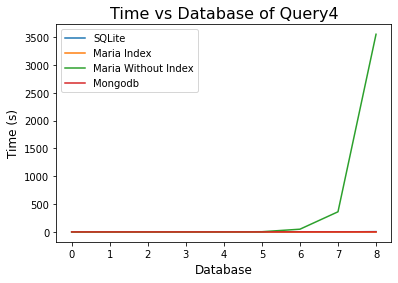

In [137]:
q4 = pd.DataFrame(np.array([mean_tq4_sql, mean_tq4_mar, mean_tq4_marwo, mean_tq4_mon]))
plt.figure()
#x = ["db1", "db2", "db3", "db4", "db5", "db6", "db7", "db8", "db9"]
l = ["SQLite", "Maria Index", "Maria Without Index", "Mongodb"]
q4.T.plot()
plt.title("Time vs Database of Query4", fontsize = 16)
plt.xlabel("Database", fontsize = 12)
plt.ylabel("Time (s)", fontsize = 12)
plt.legend(l)
#plt.xticks(x)
plt.savefig('./plots/q4.png')

**Findings:** Again the mariadb without index shoots up this time for the larger databases. The other three seem nearly meagre in front of that.

## **Part 4. System Specifications and Findings**
### **System Specifications**

- **Operating System** : Ubuntu 18.04.5 LTS
- **Memory** : 7.6 GiB
- **Processor** : Intel® Core™ i5-7200U CPU @ 2.50GHz × 4
- **Graphics** : Intel® HD Graphics 620 (KBL GT2)
- **GNOME** : 3.28.2
- **OS-type** : 64-bit
- **Disk** : 154.0 GB

### **Findings**
- **Small Databases:**  We found that for the small sized databases, all the different DBMS languages give similar results. 
- **Large Databases:** We saw a staggering difference in 2nd and 4th queries in large databases. Systems like Mariadb with insdex and SQL were much faster while Mariadb without indexing and Mongodb were much slower. This gave the importance of indexing in a databases and the advantages of a relational database.
- **SQLite:** There was not much variation in time for all databases. It took seconds for even the largest of database and largest of queries.
- **Mariadb:** This was the interesting case. With indexing the performance was much similar to SQLite and variations in time was few seconds only. But without indexing, the larger queries took a lot of time. When we were printing as well, the took hours to execute (probably half hr to 1 hour for the largest query on largest database.)
- **Mongodb:** This too took a bit longer than the SQLite but lesser than the Mariadb without indexing. But still the times were aceptable. Here sorting took longer than grouping operation. It is a non relational database. 
- **Printing:** The experiments were done thre ways:
    - Only query - While we executed and noted time of querying, it was quite less for all the databases and queries. But we see that when we type a command on shell, the shell after querying returns and prints the data as well. So I tried those too.
    - Printing - While printing the data, it took hours to perform the queries for the Mariadb without index and Mongodb database. 
    - Fetching but not printing - Finally, if I fetched data and not printed, it gave a bit different results. Intermediate between the above two.
- **Grouping and Sorting:** These were the two queries that took longer time as compared to others and which showed variation as we came to larger databases. We saw that in the maridb without index version the grouping took enormous time while in the non relational mongodb the sorting query took longest as comapred to other for the larger databases.

#### **Conclusion**
We therefore conclude that the runtime of a query varies with a lot of factors that may be the query itself (where its a liner search, or sorting, or grouping etc), the DBMS you use (maybe mongo or sqlite or maria), indexing (see the difference of indexing and non indexing in maria), printing (whether you print a query or not, printing takes a huge amount of time), relational/non relational database. So depending on your requirements, whethere you want fast implementation or you want non relational database etc etc, analysing your requirements only you should decide which system to use as each has its own advantages and disadvantages.

## **Part 5. Readme**
The 4 notebooks in the 4 folders have all the scripts for data loading, database creation, and querying. All the notebooks are described. Please note to take care of making required changess while establishing connection with the database and make sure you specify the path correctly while loading files. <br>
While querying, if you want tot print the data as well (it will take a lot longer in that case), then in the run_query function, then add additional statement 'print(x)' after 'x = c.fetchall()'. <br>
While loading data was put in each of the 4 folders, so either do that or change the path accordingly. <br>
The graphs, tables, and their codes have been included in this notebook. Also the notebook saves the graphs generated in a separate folder plots as well for future reference. <br>
The 4 notebooks also save the times generated for each query run 7 times in all 9 databases in the csv files 't1.csv', 't2.csv', 't3.csv', 't4.csv' (which correspong to query 1, query 2 and so on) in the corresponding folders. These csv files have been then loaded into this notebook to do further processing.